In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
import os
import glob

In [2]:
from tqdm import tqdm

In [3]:
human_select_cortex_region = ['A8m', 'A8dl', 'A9l','A6dl', 'A6m', 'A9m', 'A10m', 'A9/46d', 'IFJ', 'A46', 'A9/46v', 'A8vl', 'A6vl','A10l', 'A44d', 'IFS', 'A45c', 'A45r', 'A44op', 'A44v','A14m', 'A12/47o', 'A11l','A11m', 'A13', 'A12/47l','A32p','A32sg',
                'A24cd','A24rv','A4hf', 'A6cdl', 'A4ul', 'A4t', 'A4tl', 'A6cvl','A1/2/3ll', 'A4ll','A1/2/3ulhf', 'A1/2/3tonIa', 'A2','A1/2/3tru','A7r', 'A7c', 'A5l', 'A7pc', 'A7ip', 'A39c', 'A39rd', 'A40rd', 'A40c', 'A39rv','A40rv', 'A7m', 'A5m', 'dmPOS',
                'A31','A23d','A23c','A23v','cLinG', 'rCunG','cCunG', 'rLinG', 'vmPOS', 'mOccG', 'V5/MT+', 'OPC', 'iOccG', 'msOccG', 'lsOccG', 'G', 'vIa', 'dIa', 'vId/vIg', 'dIg', 'dId','A38m', 'A41/42', 'TE1.0 and TE1.2', 'A22c', 'A38l', 'A22r', 'A21c',
                'A21r', 'A37dl', 'aSTS', 'A20iv', 'A37elv', 'A20r', 'A20il', 'A37vl', 'A20cl','A20cv', 'A20rv', 'A37mv', 'A37lv', 'A35/36r', 'A35/36c', 'lateral PPHC', 'A28/34', 'TH','TI','rpSTS','cpSTS']
mouse_select_cortex_region = ['ACAd', 'ACAv', 'PL','ILA', 'ORBl', 'ORBm', 'ORBvl','MOp','SSp-n', 'SSp-bfd', 'SSp-ll', 'SSp-m',
       'SSp-ul', 'SSp-tr', 'SSp-un','SSs','PTLp','RSPagl','RSPd', 'RSPv','VISp','VISal','VISl','VISpl','VISpm','AId','AIp','AIv','GU','VISC','TEa', 'PERI', 'ECT','AUDd', 'AUDp',
       'AUDpo', 'AUDv']

human_select_subcortex_region = ['mAmyg', 'lAmyg', 'CA1', 'CA4DG', 'CA2CA3', 'subiculum','Claustrum', 'head of caudate', 'body of caudate', 'Putamen',
       'posterovemtral putamen', 'nucleus accumbens','external segment of globus pallidus','internal segment of globus pallidus', 'mPMtha', 'Stha','cTtha', 'Otha',
        'mPFtha','lPFtha','rTtha', 'PPtha']
mouse_select_subcortex_region = ['LA', 'BLA', 'BMA', 'PA','CA1', 'CA2', 'CA3', 'DG', 'SUB', 'ACB', 'CP', 'FS', 'SF', 'SH','sAMY', 'PAL', 'VENT', 'SPF', 'SPA', 'PP', 'GENd', 'LAT', 'ATN',
       'MED', 'MTN', 'ILM', 'GENv', 'EPI', 'RT']

Human_select_region = human_select_cortex_region + human_select_subcortex_region
Mouse_select_region = mouse_select_cortex_region + mouse_select_subcortex_region

## Read graph embeddings

In [4]:
def get_embedding_map(p,q):    
    with open("../../Graphembeddings/Human_Mouse_p{}_q{}_graph_embeddings.pkl".format(p,q),'rb') as f:
        embedding_data=pickle.load(f)
    embedding_zero=np.zeros((500,386,386))
    for i in range(500):
        embeeding_corr=np.corrcoef(embedding_data[i],embedding_data[i])
        embedding_zero[i]=embeeding_corr
    aver_embedding=np.mean(embedding_zero,axis=0)
    embedding_map=aver_embedding[:193,193:]
    return embedding_map

In [5]:
embedding_map=get_embedding_map(0.01,0.1)

<Axes: >

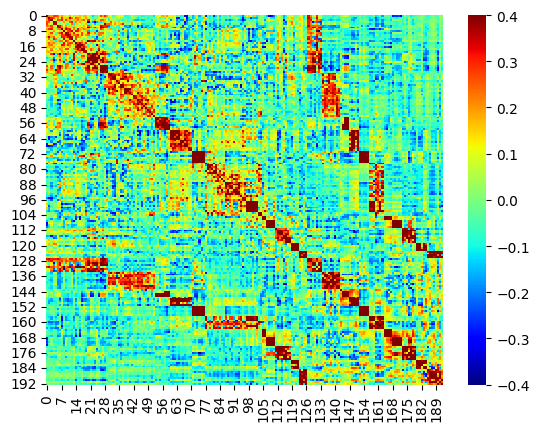

In [6]:
sns.heatmap(embedding_map, cmap='jet', vmax=0.4, vmin=-0.4)

In [7]:
embedding_map_mouse2human = embedding_map[127:, :127]
embedding_map_mouse2human.shape

(66, 127)

## Read sc matrix

In [8]:
Human_dti_dataframe=pd.read_csv('../../sc_matrix/Human_127atlas_DTI.csv')
Human_dti_dataframe.set_index('Unnamed: 0',drop=True,inplace=True)
human_127atlas = pd.read_excel('../../atlas/Table1 ROI of human atlas.xlsx')

Human_dti_dataframe.index = human_127atlas['Anatomical Name'].values.tolist()
Human_dti_dataframe.columns = human_127atlas['Anatomical Name'].values.tolist()

Human_dti_dataframe = Human_dti_dataframe[Human_select_region]
Human_dti_dataframe = Human_dti_dataframe.T[Human_select_region]

Mouse_tracer_dataframe = pd.read_csv('../../sc_matrix/Mouse_atlas_Tracer.csv')
Mouse_tracer_dataframe.set_index('Unnamed: 0',drop=True,inplace=True)
Mouse_tracer_dataframe = Mouse_tracer_dataframe[Mouse_select_region]
Mouse_tracer_dataframe = Mouse_tracer_dataframe.T[Mouse_select_region]

In [9]:
print(Human_dti_dataframe.shape, Mouse_tracer_dataframe.shape)

(127, 127) (66, 66)


In [10]:
import matplotlib.patches as patches

In [11]:
Mouse_tracer_dataframe.shape

(66, 66)

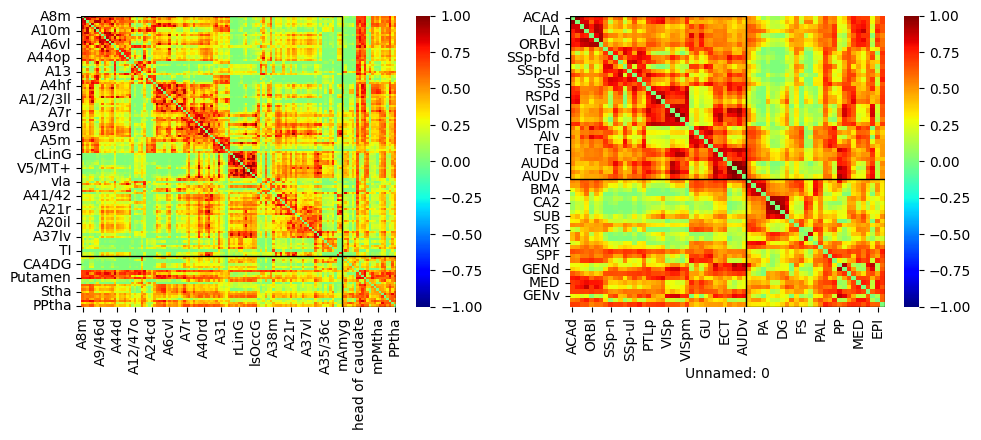

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

sns.heatmap(Human_dti_dataframe, cmap='jet', vmax=1, vmin=-1, ax=axes[0])

rect1 = patches.Rectangle((0, 0), 105, 105, linewidth=1, edgecolor='black', facecolor='none')
axes[0].add_patch(rect1)

rect2 = patches.Rectangle((105, 105), Human_dti_dataframe.shape[0] - 105, Human_dti_dataframe.shape[1] - 105, 
                          linewidth=1, edgecolor='black', facecolor='none')
axes[0].add_patch(rect2)

sns.heatmap(Mouse_tracer_dataframe, cmap='jet', vmax=1, vmin=-1, ax=axes[1])

rect3 = patches.Rectangle((0, 0), 37, 37, linewidth=1, edgecolor='black', facecolor='none')
axes[1].add_patch(rect3)

rect4 = patches.Rectangle((37, 37), Mouse_tracer_dataframe.shape[0] - 37, Mouse_tracer_dataframe.shape[1] - 37, 
                          linewidth=1, edgecolor='black', facecolor='none')
axes[1].add_patch(rect4)

plt.tight_layout()
plt.show()

In [13]:
# Human_dti_dataframe

## Read TR embeddings

#### cortical and subcortical

In [14]:
cortical_embedding_path = '../../TRembeddings/FinalModels/MixData_Cortical_Train_Repeat1000/*/*/*'

In [15]:
subcortical_embedding_path = '../../TRembeddings/FinalModels/MixData_SubCortical_Train_Repeat1000/*/*/*'

In [16]:
HM_cortical_corr = []
for path in tqdm(glob.glob(cortical_embedding_path)):
    human_cortical_emb = pd.read_csv(os.path.join(path,'Human_Cortical_Embedding.csv'))
    mouse_cortical_emb = pd.read_csv(os.path.join(path,'Mouse_Cortical_Embedding.csv'))
    human_cortical_emb.set_index('index',inplace = True,drop = True)
    mouse_cortical_emb.set_index('index',inplace = True ,drop=True)
    corr_ = np.corrcoef(human_cortical_emb.values,mouse_cortical_emb.values)[:105,105:]
    HM_cortical_corr.append(corr_)

100%|██████████| 1000/1000 [00:23<00:00, 43.41it/s]


In [17]:
DNN_HM_corr_mean = pd.DataFrame(np.mean(HM_cortical_corr,axis=0),index = human_cortical_emb.index.values,columns = mouse_cortical_emb.index.values)
DNN_HM_corr_mean = DNN_HM_corr_mean[mouse_select_cortex_region]
DNN_HM_corr_mean.shape

(105, 37)

In [18]:
HM_subcortical_corr = []
for path in tqdm(glob.glob(subcortical_embedding_path)):
    human_subcortical_emb = pd.read_csv(os.path.join(path,'Human_SubCortical_Embedding.csv'))
    mouse_subcortical_emb = pd.read_csv(os.path.join(path,'Mouse_SubCortical_Embedding.csv'))
    human_subcortical_emb.set_index('index',inplace = True,drop = True)
    mouse_subcortical_emb.set_index('index',inplace = True ,drop=True)
    corr_ = np.corrcoef(human_subcortical_emb.values,mouse_subcortical_emb.values)[:22,22:]
    HM_subcortical_corr.append(corr_)

100%|██████████| 1000/1000 [00:19<00:00, 52.13it/s]


In [19]:
DNN_HM_corr_mean_s = pd.DataFrame(np.mean(HM_subcortical_corr,axis=0),index = human_subcortical_emb.index.values,columns = mouse_subcortical_emb.index.values)
DNN_HM_corr_mean_s = DNN_HM_corr_mean_s[mouse_select_subcortex_region]
DNN_HM_corr_mean_s.shape

(22, 29)

In [20]:
DNN_map_mouse2human = np.zeros([66, 127])
DNN_map_mouse2human[:37, :105] = DNN_HM_corr_mean.T
DNN_map_mouse2human[37:, 105:] = DNN_HM_corr_mean_s.T

In [21]:
# embedding_map_mouse2human[:37, 105:] = 0
# embedding_map_mouse2human[37:, :105] = 0

## The results of TR-embeddings and graph-embeddings are displayed

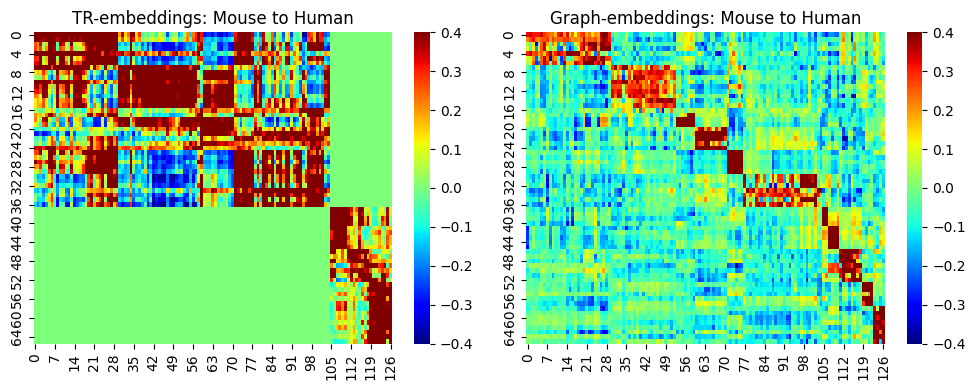

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  

sns.heatmap(DNN_map_mouse2human, cmap='jet', vmax=0.4, vmin=-0.4, ax=axes[0])
axes[0].set_title('TR-embeddings: Mouse to Human')

sns.heatmap(embedding_map_mouse2human, cmap='jet', vmax=0.4, vmin=-0.4, ax=axes[1])
axes[1].set_title('Graph-embeddings: Mouse to Human')

plt.tight_layout()
plt.show()

## Read autocorrelation matrix of graph embeddings and TR embeddings

In [23]:
H_cortical_corr = []
for path in tqdm(glob.glob(cortical_embedding_path)):
    human_cortical_emb = pd.read_csv(os.path.join(path,'Human_Cortical_Embedding.csv'))
    human_cortical_emb.set_index('index',inplace = True,drop = True)
    corr_ = np.corrcoef(human_cortical_emb.values)
    H_cortical_corr.append(corr_)

100%|██████████| 1000/1000 [00:12<00:00, 78.61it/s]


In [24]:
H_subcortical_corr = []
for path in tqdm(glob.glob(subcortical_embedding_path)):
    human_subcortical_emb = pd.read_csv(os.path.join(path,'Human_SubCortical_Embedding.csv'))
    human_subcortical_emb.set_index('index',inplace = True,drop = True)
    corr_ = np.corrcoef(human_subcortical_emb.values)
    H_subcortical_corr.append(corr_)

100%|██████████| 1000/1000 [00:09<00:00, 105.95it/s]


In [25]:
M_cortical_corr = []
for path in tqdm(glob.glob(cortical_embedding_path)):
    mouse_cortical_emb = pd.read_csv(os.path.join(path,'Mouse_Cortical_Embedding.csv'))
    mouse_cortical_emb.set_index('index',inplace = True,drop = True)
    corr_ = np.corrcoef(mouse_cortical_emb.values)
    M_cortical_corr.append(corr_)

100%|██████████| 1000/1000 [00:10<00:00, 99.71it/s]


In [26]:
M_subcortical_corr = []
for path in tqdm(glob.glob(subcortical_embedding_path)):
    mouse_subcortical_emb = pd.read_csv(os.path.join(path,'Mouse_SubCortical_Embedding.csv'))
    mouse_subcortical_emb.set_index('index',inplace = True,drop = True)
    corr_ = np.corrcoef(mouse_subcortical_emb.values)
    M_subcortical_corr.append(corr_)

100%|██████████| 1000/1000 [00:09<00:00, 103.25it/s]


In [27]:
DNN_Human_corr_mean = pd.DataFrame(np.mean(H_cortical_corr,axis=0),index = human_cortical_emb.index.values,columns = human_cortical_emb.index.values)
DNN_Mouse_corr_mean = pd.DataFrame(np.mean(M_cortical_corr,axis=0),index = mouse_cortical_emb.index.values,columns = mouse_cortical_emb.index.values)

DNN_Human_corr_mean = DNN_Human_corr_mean[human_select_cortex_region]
DNN_Human_corr_mean = DNN_Human_corr_mean.T[human_select_cortex_region]

DNN_Mouse_corr_mean = DNN_Mouse_corr_mean[mouse_select_cortex_region]
DNN_Mouse_corr_mean = DNN_Mouse_corr_mean.T[mouse_select_cortex_region]

In [28]:
DNN_Mouse_corr_mean.shape, DNN_Human_corr_mean.shape

((37, 37), (105, 105))

In [29]:
DNN_Human_corr_mean_subcortical = pd.DataFrame(np.mean(H_subcortical_corr,axis=0),index = human_subcortical_emb.index.values,columns = human_subcortical_emb.index.values)
DNN_Mouse_corr_mean_subcortical = pd.DataFrame(np.mean(M_subcortical_corr,axis=0),index = mouse_subcortical_emb.index.values,columns = mouse_subcortical_emb.index.values)

DNN_Human_corr_mean_subcortical = DNN_Human_corr_mean_subcortical[human_select_subcortex_region]
DNN_Human_corr_mean_subcortical = DNN_Human_corr_mean_subcortical.T[human_select_subcortex_region]

DNN_Mouse_corr_mean_subcortical = DNN_Mouse_corr_mean_subcortical[mouse_select_subcortex_region]
DNN_Mouse_corr_mean_subcortical = DNN_Mouse_corr_mean_subcortical.T[mouse_select_subcortex_region]

In [30]:
DNN_Human_corr_mean_subcortical.shape, DNN_Mouse_corr_mean_subcortical.shape

((22, 22), (29, 29))

## Read distance matrix

In [31]:
import nibabel as nib
from nilearn import plotting, image
from scipy.spatial.distance import pdist, squareform

atlas_127 = nib.load('../../atlas/Human_127atlas_2mm_symmetry.nii.gz')

data = atlas_127.get_fdata()
data[:45, :, :] = 0
atlas_127_half = image.new_img_like(atlas_127, data)

data  = atlas_127_half.get_fdata()
affine = atlas_127_half.affine

/share/user_data/zhishenii/micromamba/envs/shangzhengNetwork/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



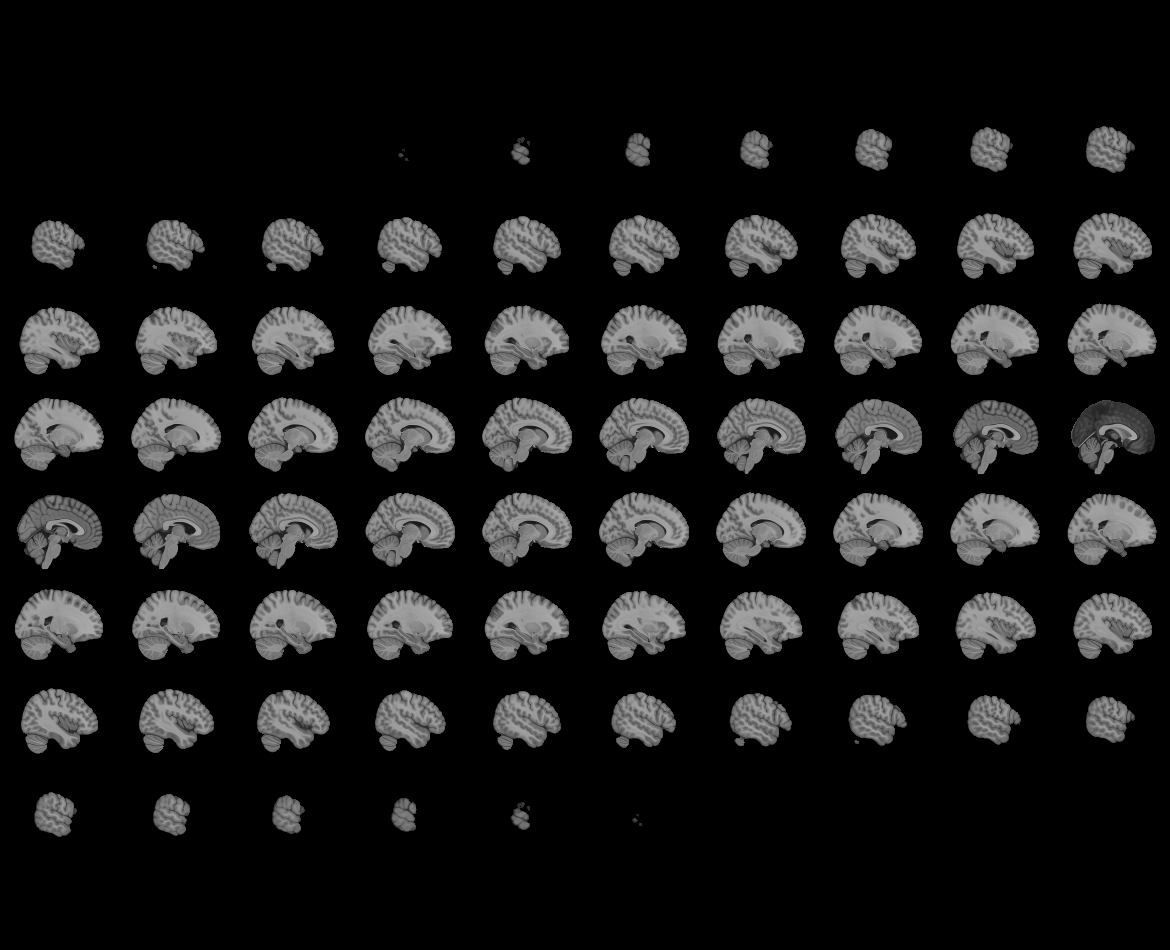
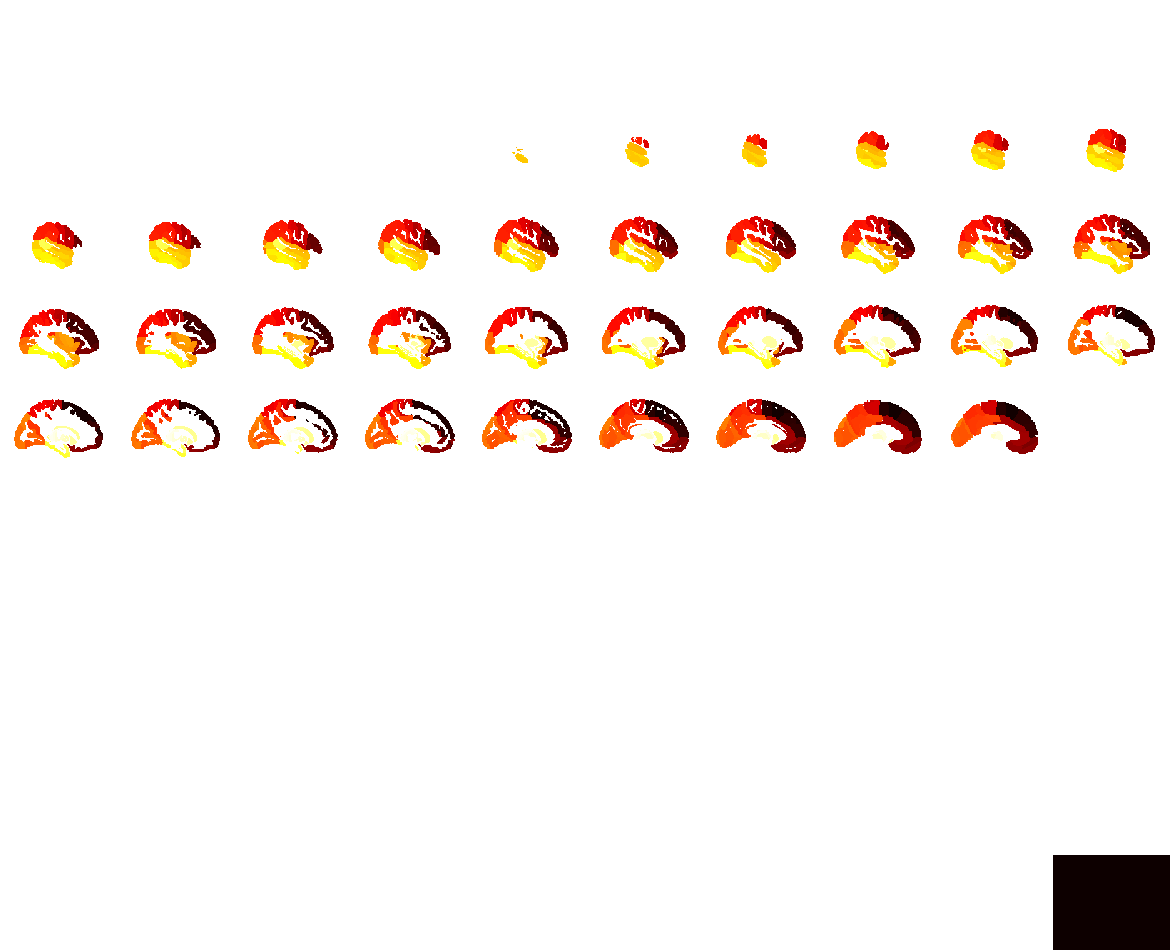

In [32]:
plotting.view_img(atlas_127_half)

In [33]:
roi_labels = np.unique(data)
roi_labels = roi_labels[roi_labels > 0] 
roi_centers = []
for roi in roi_labels:
    roi_voxel_indices = np.argwhere(data == roi)
    roi_mni_coords = nib.affines.apply_affine(affine, roi_voxel_indices)
    center_mni = roi_mni_coords.mean(axis=0)
    roi_centers.append({
        'ROI': roi,
        'Center_MNI_X': center_mni[0],
        'Center_MNI_Y': center_mni[1],
        'Center_MNI_Z': center_mni[2]
    })
roi_centers_df = pd.DataFrame(roi_centers)

In [34]:
coordinates = roi_centers_df[['Center_MNI_X', 'Center_MNI_Y', 'Center_MNI_Z']].values
distance_matrix = squareform(pdist(coordinates, metric='euclidean'))
distance_matrix_df = pd.DataFrame(distance_matrix, index=roi_centers_df['ROI'], columns=roi_centers_df['ROI'])

In [35]:
distance_matrix_df.index = human_127atlas['Anatomical Name'].values.tolist()
distance_matrix_df.columns = human_127atlas['Anatomical Name'].values.tolist()

distance_matrix_df = distance_matrix_df[Human_select_region]
distance_matrix_df = distance_matrix_df.T[Human_select_region]

distance_matrix_df_Human = distance_matrix_df.copy()

In [36]:
distance_matrix_df_Human.shape

(127, 127)

In [37]:
atlas_mouse = nib.load('../../atlas/Mouse_atlas_0.2mm.nii.gz')

data  = atlas_mouse.get_fdata()[:,:,:,0]
affine = atlas_mouse.affine
data[29:, :, :] = 0
atlas_mouse_half = image.new_img_like(atlas_mouse, data)

/share/user_data/zhishenii/micromamba/envs/shangzhengNetwork/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



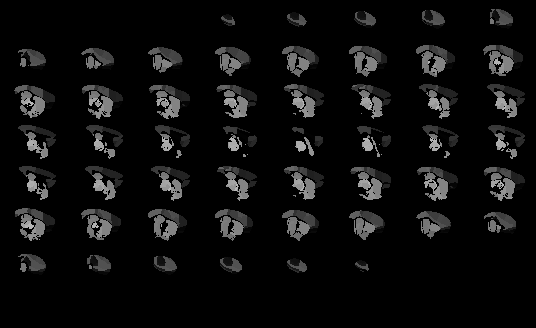
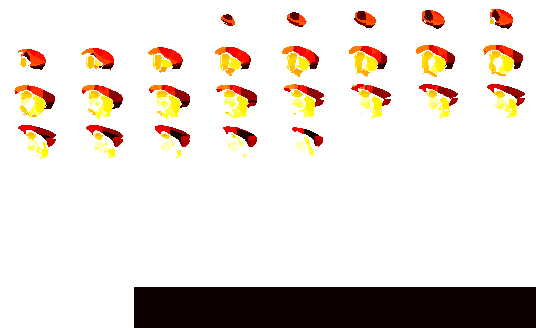

In [38]:
plotting.view_img(atlas_mouse_half, bg_img=atlas_mouse)

In [39]:
roi_labels = np.unique(data)
roi_labels = roi_labels[roi_labels > 0]
roi_centers = []
for roi in roi_labels:
    roi_voxel_indices = np.argwhere(data == roi)
    roi_mni_coords = nib.affines.apply_affine(affine, roi_voxel_indices)
    center_mni = roi_mni_coords.mean(axis=0)
    roi_centers.append({
        'ROI': roi,
        'Center_MNI_X': center_mni[0],
        'Center_MNI_Y': center_mni[1],
        'Center_MNI_Z': center_mni[2]
    })
roi_centers_df = pd.DataFrame(roi_centers)

In [40]:
coordinates = roi_centers_df[['Center_MNI_X', 'Center_MNI_Y', 'Center_MNI_Z']].values
distance_matrix = squareform(pdist(coordinates, metric='euclidean'))
distance_matrix_df = pd.DataFrame(distance_matrix, index=roi_centers_df['ROI'], columns=roi_centers_df['ROI'])

In [41]:
mouse_altas_csv = pd.read_excel('../../atlas/Table2 ROI of mouse atlas.xlsx')
distance_matrix_df.index = mouse_altas_csv['Allen Abbreviation'].values.tolist()
distance_matrix_df.columns = mouse_altas_csv['Allen Abbreviation'].values.tolist()
distance_matrix_df = distance_matrix_df[Mouse_select_region]
distance_matrix_df = distance_matrix_df.T[Mouse_select_region]
distance_matrix_df_Mouse = distance_matrix_df.copy()

In [42]:
distance_matrix_df_Mouse.shape

(66, 66)

## The similarity between TR embeddings, graph embeddings, and the sc matrix.

In [43]:
from scipy.linalg import lstsq
import numpy as np2
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

def regress_cov(features, covariance):

    if features.ndim == 1:
        features = features.reshape(len(features), 1)
    if covariance.ndim == 1:
        covariance = covariance.reshape(len(features), 1)
    residuals = np.zeros_like(features)
    result = np.zeros_like(features)
    b = np.hstack([covariance, np.ones([len(covariance), 1])])
    for f in range(features.shape[1]):
        w = lstsq(b, features[:, f])
        residuals[:, f] = features[:, f] - covariance.dot(w[0][:-1])
    for f in range(features.shape[1]):
        if np.min(features[:, f]) == np.max(features[:, f]):
            result[:, f] = features[:, f]
        else:
            result[:, f] = MinMaxScaler(feature_range=(np.min(features[:, f]),
                                                       np.max(features[:, f]))).\
                fit_transform(residuals[:, f].reshape(-1, 1)).flatten()

    return result

## whole-brain

In [44]:
mouse_distance = distance_matrix_df_Mouse.values[np.tril_indices_from(distance_matrix_df_Mouse.values, -1)]
mouse_tracer = Mouse_tracer_dataframe.values[np.tril_indices_from(Mouse_tracer_dataframe.values, -1)]
mouse_node2vec = embedding_map[127:, 127:][np.tril_indices_from(embedding_map[127:, 127:], -1)]

human_distance = distance_matrix_df_Human.values[np.tril_indices_from(distance_matrix_df_Human.values, -1)]
human_dti = Human_dti_dataframe.values[np.tril_indices_from(Human_dti_dataframe.values, -1)]
human_node2vec = embedding_map[:127, :127][np.tril_indices_from(embedding_map[:127, :127], -1)]

In [45]:
mouse_node2vec.shape

(2145,)

In [46]:
mouse_tracer_all_regress = regress_cov(mouse_tracer, mouse_distance).flatten()
mouse_node2vec_all_regress =  regress_cov(mouse_node2vec, mouse_distance).flatten()

In [47]:
human_dti_all_regress = regress_cov(human_dti, human_distance).flatten()
human_node2vec_all_regress = regress_cov(human_node2vec, human_distance).flatten()

In [48]:
print(stats.pearsonr(mouse_tracer_all_regress, 
                      mouse_node2vec_all_regress))

PearsonRResult(statistic=0.6322964883285969, pvalue=7.589284593730117e-240)


In [49]:
print(stats.pearsonr(human_dti_all_regress, 
                      human_node2vec_all_regress))

PearsonRResult(statistic=0.5919786729867292, pvalue=0.0)


In [50]:
print(stats.spearmanr(mouse_tracer, mouse_node2vec))
print(stats.spearmanr(regress_cov(mouse_tracer, mouse_distance).flatten(), 
                      regress_cov(mouse_node2vec, mouse_distance).flatten()))

SpearmanrResult(correlation=0.7259450095619533, pvalue=0.0)
SpearmanrResult(correlation=0.6517107106981015, pvalue=1.3401463505592978e-259)


In [51]:
print(stats.spearmanr(human_node2vec, human_dti))
print(stats.spearmanr(regress_cov(human_dti, human_distance).flatten(), 
                      regress_cov(human_node2vec, human_distance).flatten()))

SpearmanrResult(correlation=0.6366228463839598, pvalue=0.0)
SpearmanrResult(correlation=0.6107535241705135, pvalue=0.0)


In [52]:
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
font_path ='whitney-medium.otf'
custom_font = FontProperties(fname=font_path)
from scipy.stats import pearsonr

In [53]:
def normalize_to_0_1(arr):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    normalized = (arr - arr_min) / (arr_max - arr_min)
    return normalized

In [54]:
def plot_img_(x,y,title,cmap='Blues',color='skyblue'):

    x = normalize_to_0_1(x)
    
    r, _ = pearsonr(x, y)

    fig = plt.figure(figsize=(4, 2), dpi=400)

    from matplotlib.gridspec import GridSpec
    
    gs = GridSpec(4, 4, figure=fig)
    
    ax = fig.add_subplot(gs[1:4, 0:3])
    
    sns.kdeplot(x=x, 
                y=y, 
                fill=True, 
                cmap=cmap, 
                alpha=1, 
                cbar=False,zorder=2) 
    
    sns.regplot(x=x, 
                y=y, 
                scatter=False, 
                color=color, 
                line_kws={'alpha': 0.8, 'linewidth': 1}, 
                ax=ax)
    
    ax.spines['left'].set_linewidth(0.6)
    ax.spines['bottom'].set_linewidth(0.6)
    ax.spines['right'].set_linewidth(0.6)
    ax.spines['top'].set_linewidth(0.6)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['top'].set_color('black')
    
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.2, 1.2)
    
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([0, 0.5, 1])
    
    ax.set_xticklabels([0, 0.5, 1], fontproperties=custom_font, fontsize=10, color='black')
    ax.set_yticklabels([0, 0.5, 1], fontproperties=custom_font, fontsize=10, color='black')
    
    ax.tick_params(axis='x', labelsize=10, labelcolor='black', labelrotation=0, pad=0)
    ax.tick_params(axis='y', labelsize=10, labelcolor='black', labelrotation=0, pad=0)
    
    
    ax.text(0.33, 0.9, f'Pearson r = {r:.2f}', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, 
            fontsize=7, fontproperties=custom_font, color='black',bbox=dict(facecolor='white', edgecolor='gray', boxstyle='square,pad=0.3', linewidth=0.8))
    
    ax.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=0.3, zorder=1)
    
    plt.tight_layout()
    # plt.savefig('./File/{}.png'.format(title),format='png',dpi=600)

In [55]:
import matplotlib.colors as mcolors

In [56]:
colors = ["#FEE7D0", "#FDC692", "#FD9E54", "#F87E2B", "#ED6410", "#CE4401"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_oranges", colors, N=256)

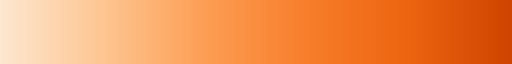

In [57]:
custom_cmap

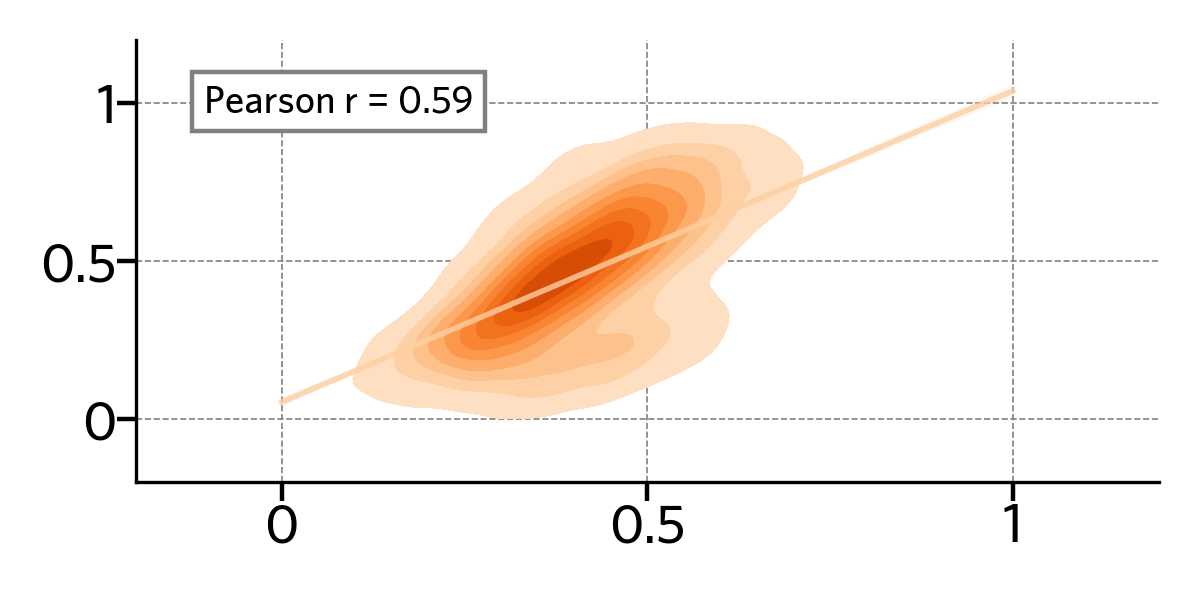

In [58]:
plot_img_(human_node2vec_all_regress,human_dti_all_regress,'Human_all_similarity_node2vec',cmap=custom_cmap,color='#fdcfa1')

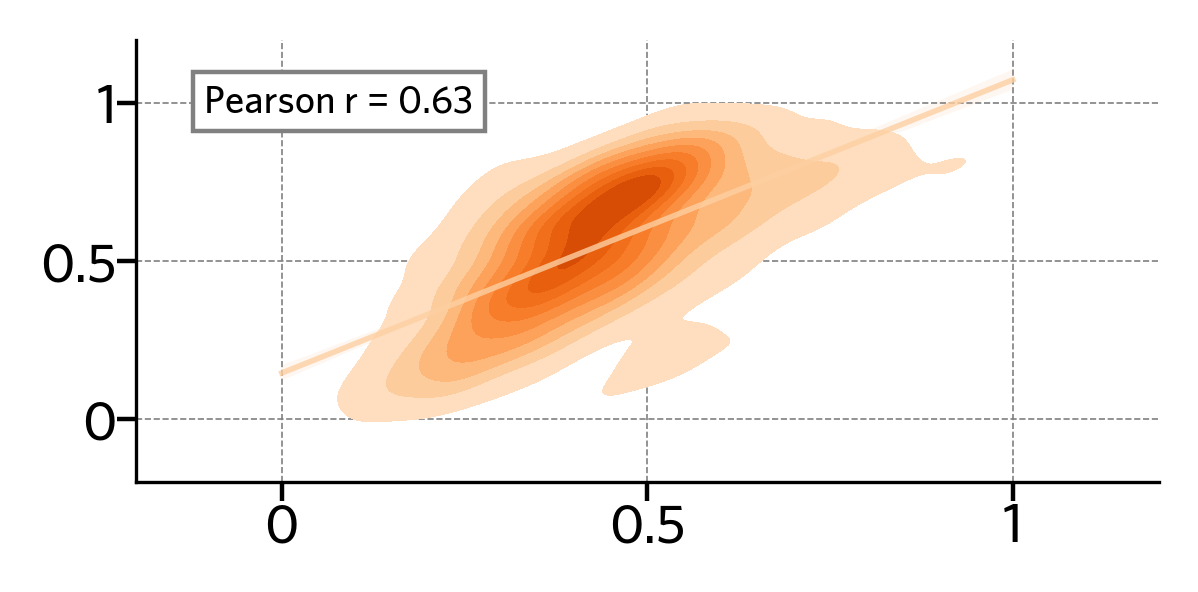

In [59]:
plot_img_(mouse_node2vec_all_regress,mouse_tracer_all_regress,'Mouse_all_similarity_node2vec',cmap=custom_cmap,color='#fdcfa1')

## cortex

In [60]:
mouse_distance_cortical = distance_matrix_df_Mouse.values[:37, :37][np.tril_indices_from(distance_matrix_df_Mouse.values[:37, :37], -1)]
mouse_tracer_cortical = Mouse_tracer_dataframe.values[:37, :37][np.tril_indices_from(Mouse_tracer_dataframe.values[:37, :37], -1)]
mouse_node2vec_cortical = embedding_map[127:, 127:][:37, :37][np.tril_indices_from(embedding_map[127:, 127:][:37, :37], -1)]

human_distance_cortical = distance_matrix_df_Human.values[:105, :105][np.tril_indices_from(distance_matrix_df_Human.values[:105, :105], -1)]
human_dti_cortical = Human_dti_dataframe.values[:105, :105][np.tril_indices_from(Human_dti_dataframe.values[:105, :105], -1)]
human_node2vec_cortical = embedding_map[:127, :127][:105, :105][np.tril_indices_from(embedding_map[:127, :127][:105, :105], -1)]

In [61]:
human_DNN_cortical = DNN_Human_corr_mean.values[np.tril_indices_from(DNN_Human_corr_mean.values, -1)]
mouse_DNN_cortical = DNN_Mouse_corr_mean.values[np.tril_indices_from(DNN_Mouse_corr_mean.values, -1)]

In [62]:
mouse_cortical_node2vec_regress =  regress_cov(mouse_node2vec_cortical, mouse_distance_cortical).flatten()

In [63]:
human_cortical_node2vec_regress =  regress_cov(human_node2vec_cortical, human_distance_cortical).flatten()

In [64]:
mouse_cortical_dnn_regress = regress_cov(mouse_DNN_cortical, mouse_distance_cortical).flatten()
human_cortical_dnn_regress = regress_cov(human_DNN_cortical, human_distance_cortical).flatten()

In [65]:
mouse_tracer_cortical_regress = regress_cov(mouse_tracer_cortical, mouse_distance_cortical).flatten()

In [66]:
human_dti_cortical_regress = regress_cov(human_dti_cortical, human_distance_cortical).flatten()

In [67]:
print(stats.pearsonr(mouse_cortical_node2vec_regress, 
                      mouse_tracer_cortical_regress))

PearsonRResult(statistic=0.5953836426828826, pvalue=4.021255221250175e-65)


In [68]:
print(stats.pearsonr(human_cortical_node2vec_regress, 
                      human_dti_cortical_regress))

PearsonRResult(statistic=0.6180721126703452, pvalue=0.0)


In [69]:
print(stats.pearsonr(mouse_cortical_dnn_regress, 
                      mouse_tracer_cortical_regress))

PearsonRResult(statistic=0.4150944007937713, pvalue=4.005927481660188e-29)


In [70]:
print(stats.pearsonr(human_cortical_dnn_regress, 
                      human_dti_cortical_regress))

PearsonRResult(statistic=0.32265165597739087, pvalue=1.7173185960853567e-132)


In [71]:
print(stats.spearmanr(mouse_tracer_cortical, mouse_node2vec_cortical))
print(stats.spearmanr(regress_cov(mouse_tracer_cortical, mouse_distance_cortical).flatten(), 
                      regress_cov(mouse_node2vec_cortical, mouse_distance_cortical).flatten()))

SpearmanrResult(correlation=0.814767885311561, pvalue=2.4532166224263807e-159)
SpearmanrResult(correlation=0.6298161425282076, pvalue=6.840925804733027e-75)


In [72]:
print(stats.spearmanr(mouse_tracer_cortical, mouse_DNN_cortical))
print(stats.spearmanr(regress_cov(mouse_tracer_cortical, mouse_distance_cortical).flatten(), 
                      regress_cov(mouse_DNN_cortical, mouse_distance_cortical).flatten()))

SpearmanrResult(correlation=0.4787228210726988, pvalue=1.8952387216956197e-39)
SpearmanrResult(correlation=0.4478127325282696, pvalue=3.683231572124728e-34)


In [73]:
print(stats.spearmanr(human_node2vec_cortical, human_dti_cortical))
print(stats.spearmanr(regress_cov(human_dti_cortical, human_distance_cortical).flatten(), 
                      regress_cov(human_node2vec_cortical, human_distance_cortical).flatten()))

SpearmanrResult(correlation=0.6846158316220986, pvalue=0.0)
SpearmanrResult(correlation=0.635581366305639, pvalue=0.0)


In [74]:
print(stats.spearmanr(human_DNN_cortical, human_dti_cortical))
print(stats.spearmanr(regress_cov(human_dti_cortical, human_distance_cortical).flatten(), 
                      regress_cov(human_DNN_cortical, human_distance_cortical).flatten()))

SpearmanrResult(correlation=0.5133923824420616, pvalue=0.0)
SpearmanrResult(correlation=0.3252127718092928, pvalue=1.0823002507351673e-134)


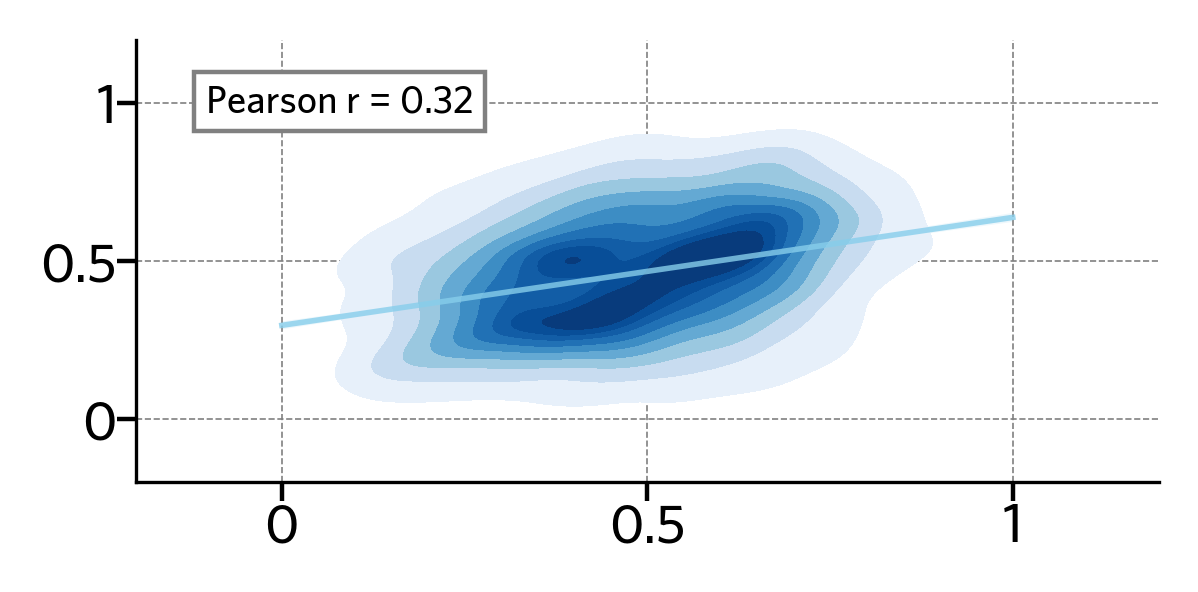

In [75]:
plot_img_(human_cortical_dnn_regress,human_dti_cortical_regress,'Human_corical_similarity_dnn')

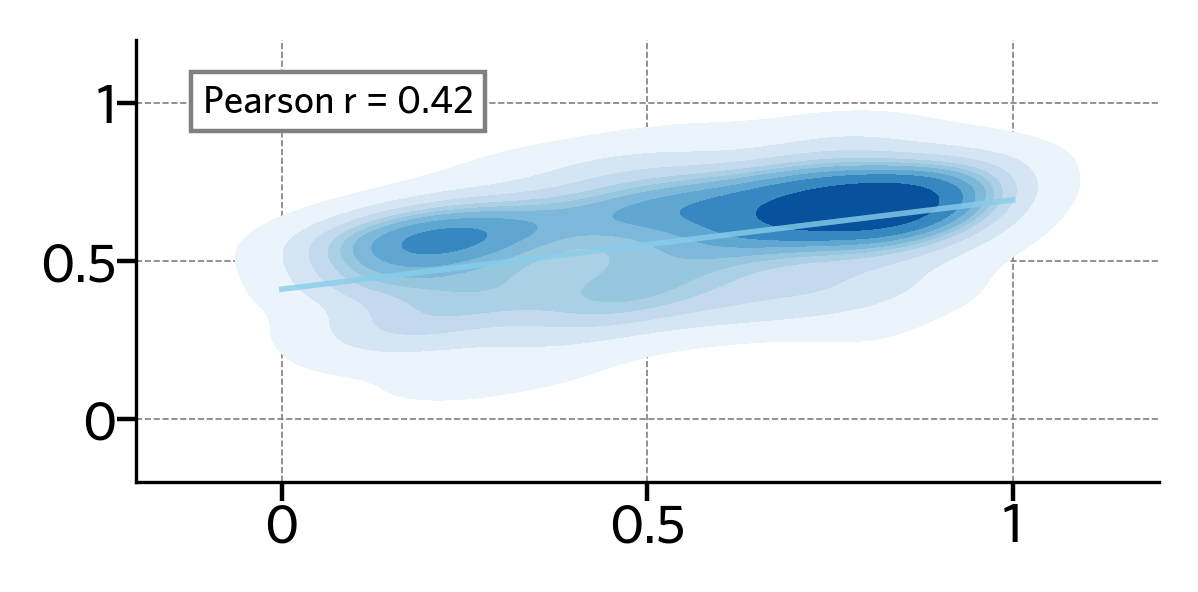

In [76]:
plot_img_(mouse_cortical_dnn_regress,mouse_tracer_cortical_regress,'Mouse_cortical_similarity_dnn')

## Subcortex

In [77]:
mouse_distance_subcortical = distance_matrix_df_Mouse.values[37:, 37:][np.tril_indices_from(distance_matrix_df_Mouse.values[37:, 37:], -1)]
mouse_tracer_subcortical = Mouse_tracer_dataframe.values[37:, 37:][np.tril_indices_from(Mouse_tracer_dataframe.values[37:, 37:], -1)]
mouse_node2vec_subcortical = embedding_map[127:, 127:][37:, 37:][np.tril_indices_from(embedding_map[127:, 127:][37:, 37:], -1)]

human_distance_subcortical = distance_matrix_df_Human.values[105:, 105:][np.tril_indices_from(distance_matrix_df_Human.values[105:, 105:], -1)]
human_dti_subcortical = Human_dti_dataframe.values[105:, 105:][np.tril_indices_from(Human_dti_dataframe.values[105:, 105:], -1)]
human_node2vec_subcortical = embedding_map[:127, :127][105:, 105:][np.tril_indices_from(embedding_map[:127, :127][105:, 105:], -1)]

In [78]:
human_DNN_subcortical = DNN_Human_corr_mean_subcortical.values[np.tril_indices_from(DNN_Human_corr_mean_subcortical.values, -1)]
mouse_DNN_subcortical = DNN_Mouse_corr_mean_subcortical.values[np.tril_indices_from(DNN_Mouse_corr_mean_subcortical.values, -1)]

In [79]:
mouse_subcortical_dnn_regress = regress_cov(mouse_DNN_subcortical, mouse_distance_subcortical).flatten()
human_subcortical_dnn_regress = regress_cov(human_DNN_subcortical, human_distance_subcortical).flatten()

In [80]:
mouse_tracer_subcortical_regress = regress_cov(mouse_tracer_subcortical, mouse_distance_subcortical).flatten()

In [81]:
human_dti_subcortical_regress = regress_cov(human_dti_subcortical, human_distance_subcortical).flatten()

In [82]:
print(stats.pearsonr(mouse_subcortical_dnn_regress, 
                      mouse_tracer_subcortical_regress))

PearsonRResult(statistic=0.37583367961125635, pvalue=4.551909437150481e-15)


In [83]:
print(stats.pearsonr(human_subcortical_dnn_regress, 
                      human_dti_subcortical_regress))

PearsonRResult(statistic=0.11595697788233965, pvalue=0.07861649567779122)


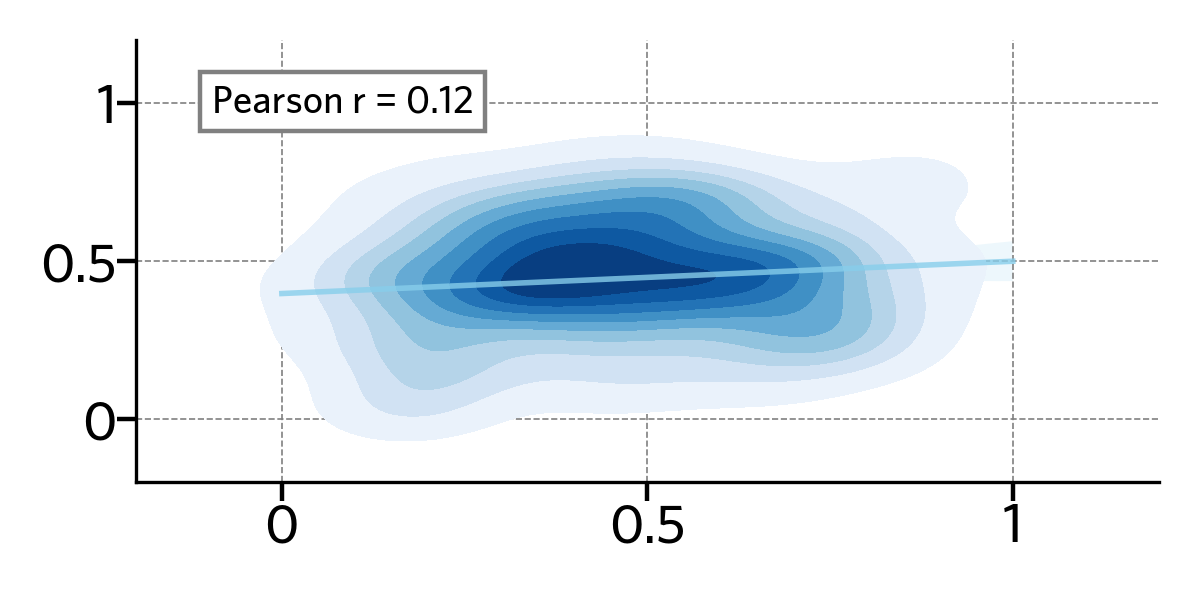

In [84]:
plot_img_(human_subcortical_dnn_regress,human_dti_subcortical_regress,'Human_subcorical_similarity_dnn')

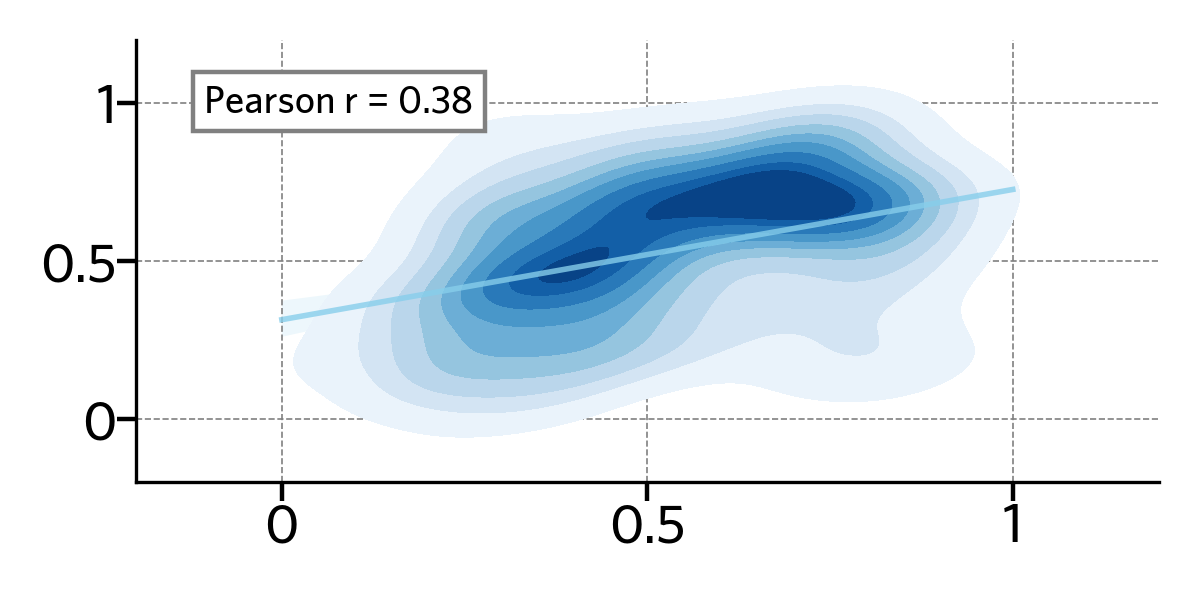

In [85]:
plot_img_(mouse_subcortical_dnn_regress,mouse_tracer_subcortical_regress,'Mouse_subcorical_similarity_dnn')

In [86]:
print(stats.spearmanr(mouse_tracer_subcortical, mouse_node2vec_subcortical))
print(stats.spearmanr(regress_cov(mouse_tracer_subcortical, mouse_distance_subcortical).flatten(), 
                      regress_cov(mouse_node2vec_subcortical, mouse_distance_subcortical).flatten()))

SpearmanrResult(correlation=0.7805387618767593, pvalue=1.866692489136764e-84)
SpearmanrResult(correlation=0.7688219343391758, pvalue=1.8252719144720793e-80)


In [87]:
print(stats.spearmanr(mouse_tracer_subcortical, mouse_DNN_subcortical))
print(stats.spearmanr(regress_cov(mouse_tracer_subcortical, mouse_distance_subcortical).flatten(), 
                      regress_cov(mouse_DNN_subcortical, mouse_distance_subcortical).flatten()))

SpearmanrResult(correlation=0.46825777291089826, pvalue=1.6216800057954337e-23)
SpearmanrResult(correlation=0.38038262176193216, pvalue=1.9999147335570544e-15)


In [88]:
print(stats.spearmanr(human_node2vec_subcortical, human_dti_subcortical))
print(stats.spearmanr(regress_cov(human_dti_subcortical, human_distance_subcortical).flatten(), 
                     regress_cov(human_node2vec_subcortical, human_distance_subcortical).flatten()))

SpearmanrResult(correlation=0.3593706761453987, pvalue=1.8958538111573734e-08)
SpearmanrResult(correlation=0.1770780194318425, pvalue=0.006973474997556292)


In [89]:
print(stats.spearmanr(human_DNN_subcortical, human_dti_subcortical))
print(stats.spearmanr(regress_cov(human_dti_subcortical, human_distance_subcortical).flatten(), 
                      regress_cov(human_DNN_subcortical, human_distance_subcortical).flatten()))

SpearmanrResult(correlation=0.3024680677133307, pvalue=2.8364947126365437e-06)
SpearmanrResult(correlation=0.08844701026110323, pvalue=0.18037131946007)


## mouse to human

In [90]:
Mouse_tracer_dataframe.shape, Human_dti_dataframe.shape

((66, 66), (127, 127))

In [91]:
mouse2human_dti = np.dot(stats.zscore(DNN_map_mouse2human.T, axis=1), np.dot(Mouse_tracer_dataframe, stats.zscore(DNN_map_mouse2human, axis=0)))

mouse_array = mouse2human_dti[np.tril_indices_from(mouse2human_dti, -1)]
human_array = Human_dti_dataframe.values[np.tril_indices_from(Human_dti_dataframe.values, -1)]

print(stats.pearsonr(mouse_array,human_array))

PearsonRResult(statistic=0.27840705828091633, pvalue=2.3353347867518877e-142)


In [92]:
mouse2human_dti = np.dot(stats.zscore(embedding_map_mouse2human.T, axis=1), np.dot(Mouse_tracer_dataframe, stats.zscore(embedding_map_mouse2human, axis=0)))

mouse_array = mouse2human_dti[np.tril_indices_from(mouse2human_dti, -1)]
human_array = Human_dti_dataframe.values[np.tril_indices_from(Human_dti_dataframe.values, -1)]

print(stats.pearsonr(mouse_array,
                      human_array))

PearsonRResult(statistic=0.43114865223070387, pvalue=0.0)


In [93]:
mouse2human_dti = np.dot(stats.zscore(DNN_map_mouse2human.T, axis=1), np.dot(Mouse_tracer_dataframe, stats.zscore(DNN_map_mouse2human, axis=0)))
mouse2human_dti_reg = regress_cov(mouse2human_dti[np.tril_indices_from(mouse2human_dti, -1)], 
                                  distance_matrix_df_Human.values[np.tril_indices_from( distance_matrix_df_Human.values, -1)])

human_dti_reg = regress_cov(Human_dti_dataframe.values[np.tril_indices_from(Human_dti_dataframe.values, -1)],
                            distance_matrix_df_Human.values[np.tril_indices_from( distance_matrix_df_Human.values, -1)])

print(stats.pearsonr([i[0] for i in mouse2human_dti_reg] , [i[0] for i in human_dti_reg]))

PearsonRResult(statistic=0.2004409140416515, pvalue=2.639040958891402e-73)


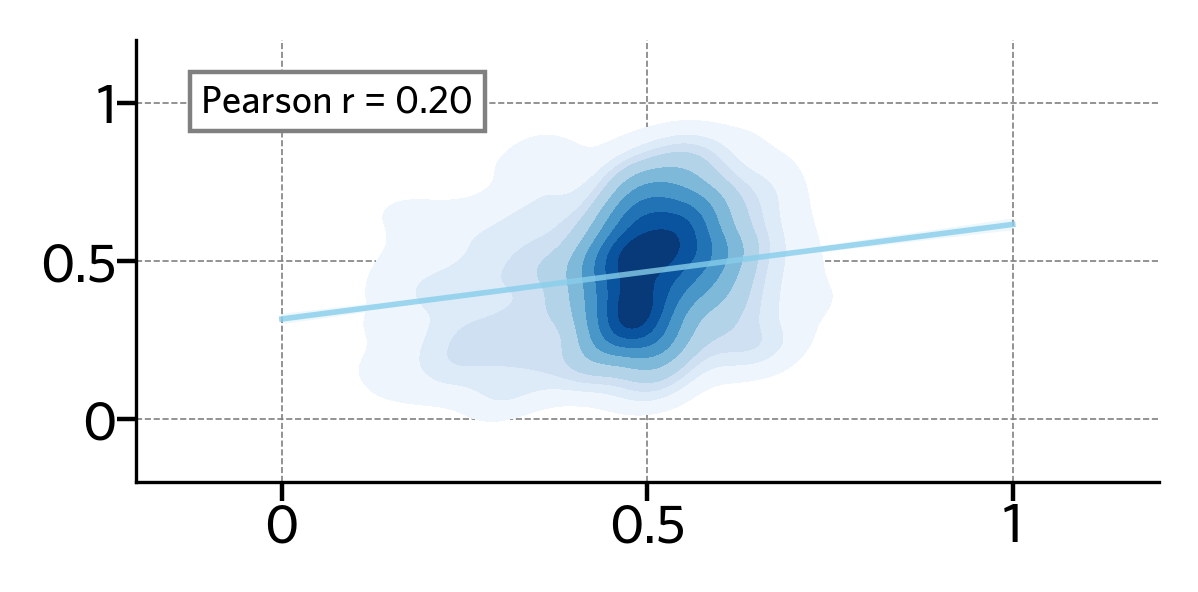

In [94]:
plot_img_([i[0] for i in mouse2human_dti_reg],[i[0] for i in human_dti_reg],'Mouse_to_Human_similarity_dnn')

In [95]:
mouse2human_dti = np.dot(stats.zscore(embedding_map_mouse2human.T, axis=1), np.dot(Mouse_tracer_dataframe, stats.zscore(embedding_map_mouse2human, axis=0)))
mouse2human_dti_reg = regress_cov(mouse2human_dti[np.tril_indices_from(mouse2human_dti, -1)], 
                                  distance_matrix_df_Human.values[np.tril_indices_from( distance_matrix_df_Human.values, -1)])

human_dti_reg = regress_cov(Human_dti_dataframe.values[np.tril_indices_from(Human_dti_dataframe.values, -1)],
                            distance_matrix_df_Human.values[np.tril_indices_from( distance_matrix_df_Human.values, -1)])

print(stats.pearsonr([i[0] for i in mouse2human_dti_reg], [i[0] for i in human_dti_reg]))

PearsonRResult(statistic=0.3211198392372807, pvalue=2.5599393967294938e-191)


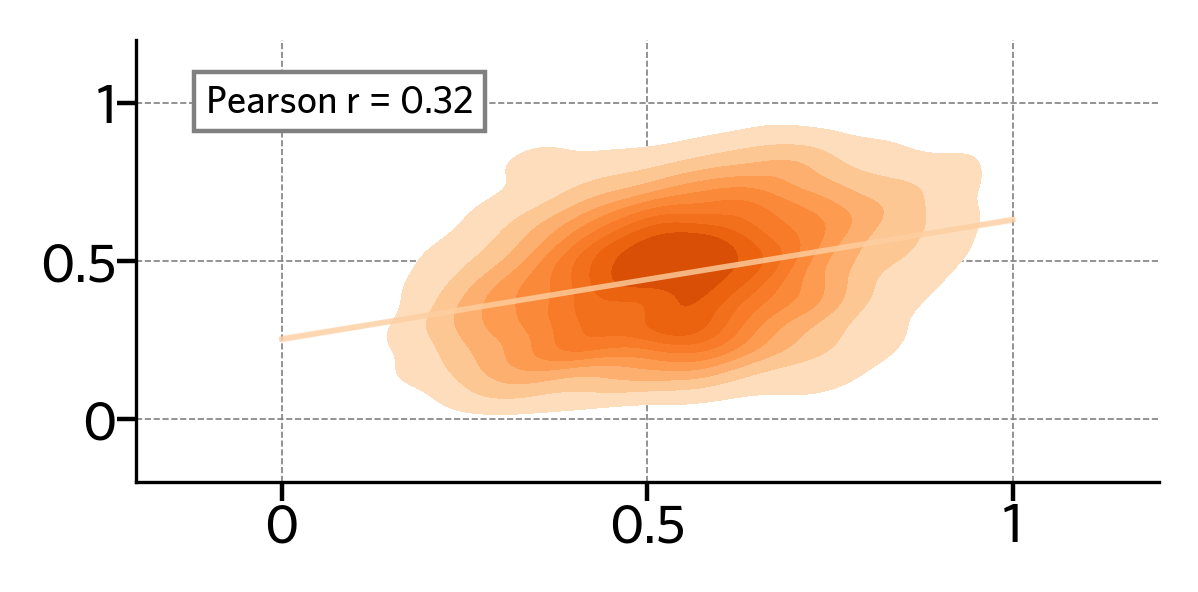

In [96]:
plot_img_([i[0] for i in mouse2human_dti_reg], [i[0] for i in human_dti_reg],'Mouse_to_Human_similarity_node2vec',cmap=custom_cmap,color='#fdcfa1')